<a href="https://colab.research.google.com/github/colgate116/T_rex_game/blob/master/CompVision_Shark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi
!pip install ultralytics

Fri May 17 08:20:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from ultralytics import YOLO
import ultralytics
ultralytics.checks()
import torch
from IPython.display import display, Image
import os
import matplotlib.pyplot as plt
import shutil
import numpy as np
import io
import cv2
import zipfile
from PIL import Image
from moviepy.editor import *
from tqdm import tqdm_notebook
from base64 import b64encode

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


Загруаем zip.архив

In [5]:
HOME = "/content/"
dataSet_name = "SharkDS.zip"

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

zip_file = f"/{HOME}/{dataSet_name}"
output = f"/{HOME}"

with zipfile.ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall(output)

mkdir: cannot create directory ‘/content//datasets’: File exists
/content/datasets


In [8]:
img_path = f"/{output}/train/images/"
lbl_path = f"/{output}/train/labels/"
img_name = os.listdir(img_path)
lbl_name = os.listdir(lbl_path)

In [9]:
labels = []
for i in range(len(lbl_name)):
  with open (lbl_path+lbl_name[i]) as file:
    temp = file.read()
    labels.append(temp)
classes = ["Human","Shark"]

In [10]:
def class_parser(x):
    return f"{x}/n"

In [30]:
img_path = "/train/images"

In [37]:
yaml_file = f"train: ..{img_path}\nval: ..{img_path}\n\nnames:\n 0: '{classes[0]}' \n 1: '{classes[1]}'"
with open("//content/data.yaml", "w") as f:
  f.write(yaml_file)
%cat /content/data.yaml

train: ../train/images
val: ../train/images

names:
 0: 'Human' 
 1: 'Shark'

In [39]:
yaml_path = '/content/data.yaml'

In [38]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={yaml_path} epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

In [41]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={yaml_path}

/content
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/train/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:07<00:00,  1.89s/it]
                   all         50        108      0.936      0.942      0.971      0.743
                 Human         50         49       0.89      0.918      0.948      0.651
                 Shark         50         59      0.983      0.966      0.993      0.835
Speed: 20.7ms preprocess, 26.4ms inference, 0.0ms loss, 47.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [42]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train5/weights/best.pt conf=0.25 source={HOME}/{img_path} save=True

/content
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/50 /content/train/images/vlcsnap-2024-05-16-17h09m26s199_png.rf.6ae4bb9414c22fdd5f1e04c43499f50e.jpg: 480x800 1 Shark, 111.9ms
image 2/50 /content/train/images/vlcsnap-2024-05-16-17h10m12s833_png.rf.dc5cc3b85ecd82314b37eebab27f8e8f.jpg: 480x800 1 Shark, 15.7ms
image 3/50 /content/train/images/vlcsnap-2024-05-16-17h10m23s331_png.rf.69ffd43c6b8cd37511aee4dc2532c5ab.jpg: 480x800 1 Shark, 15.6ms
image 4/50 /content/train/images/vlcsnap-2024-05-16-17h10m33s266_png.rf.b217c0650afced498f0e5821c11f9c80.jpg: 480x800 1 Shark, 15.5ms
image 5/50 /content/train/images/vlcsnap-2024-05-16-17h10m41s159_png.rf.3d2ed9ac87b5fef6a64c89e838d4c6f7.jpg: 480x800 3 Sharks, 15.6ms
image 6/50 /content/train/images/vlcsnap-2024-05-16-17h10m46s284_png.rf.e4a0b1fde67f7600c43de3aa7cdc21dc.jpg: 480x800 1 Shark, 15.6ms
image 7/50 /cont

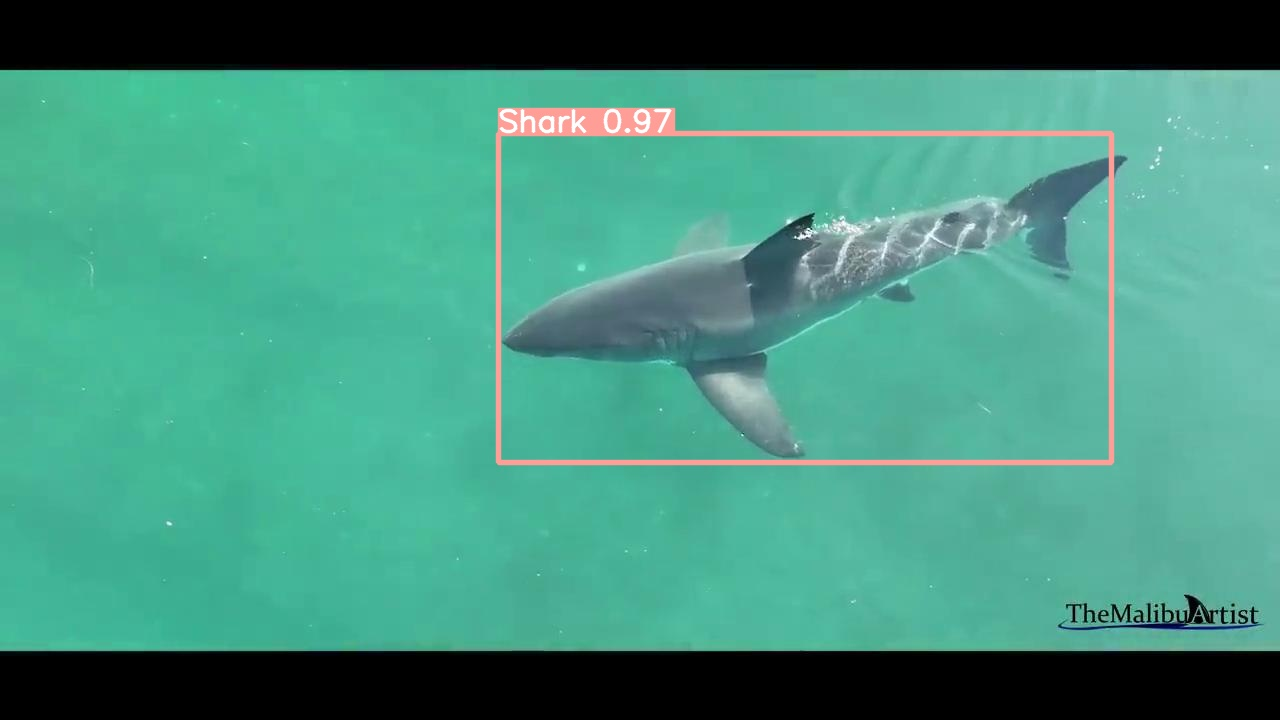

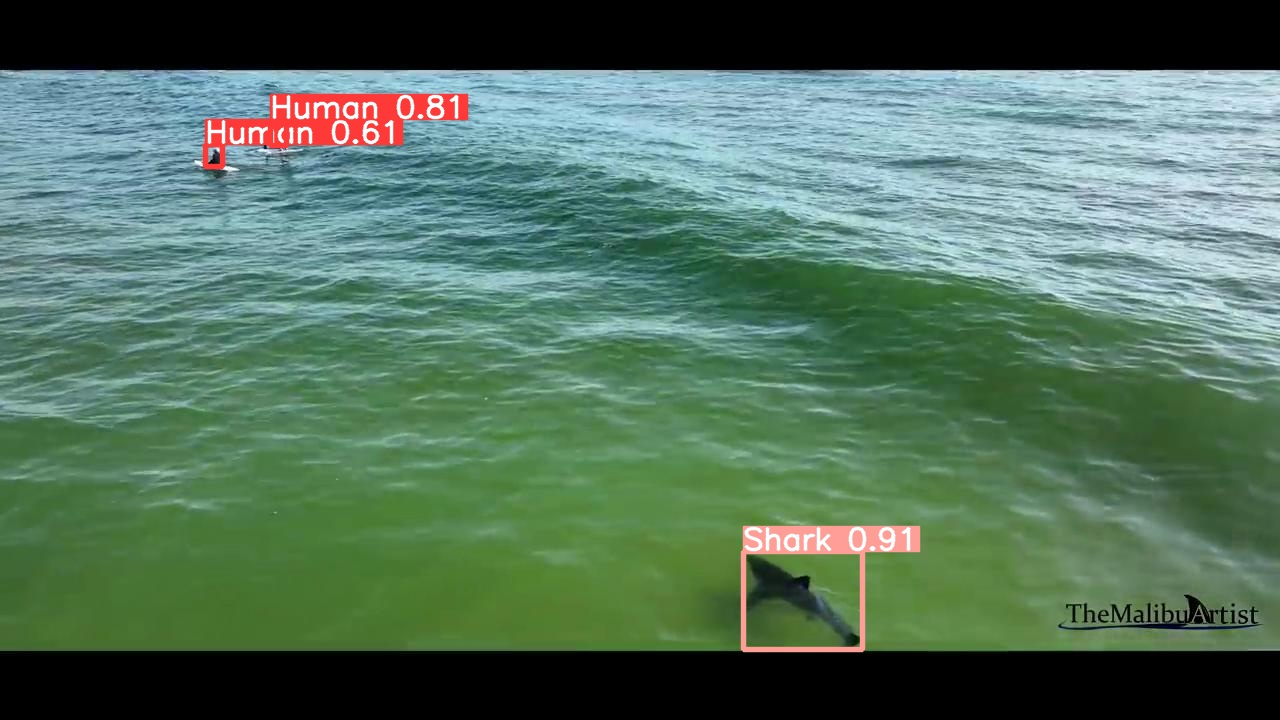

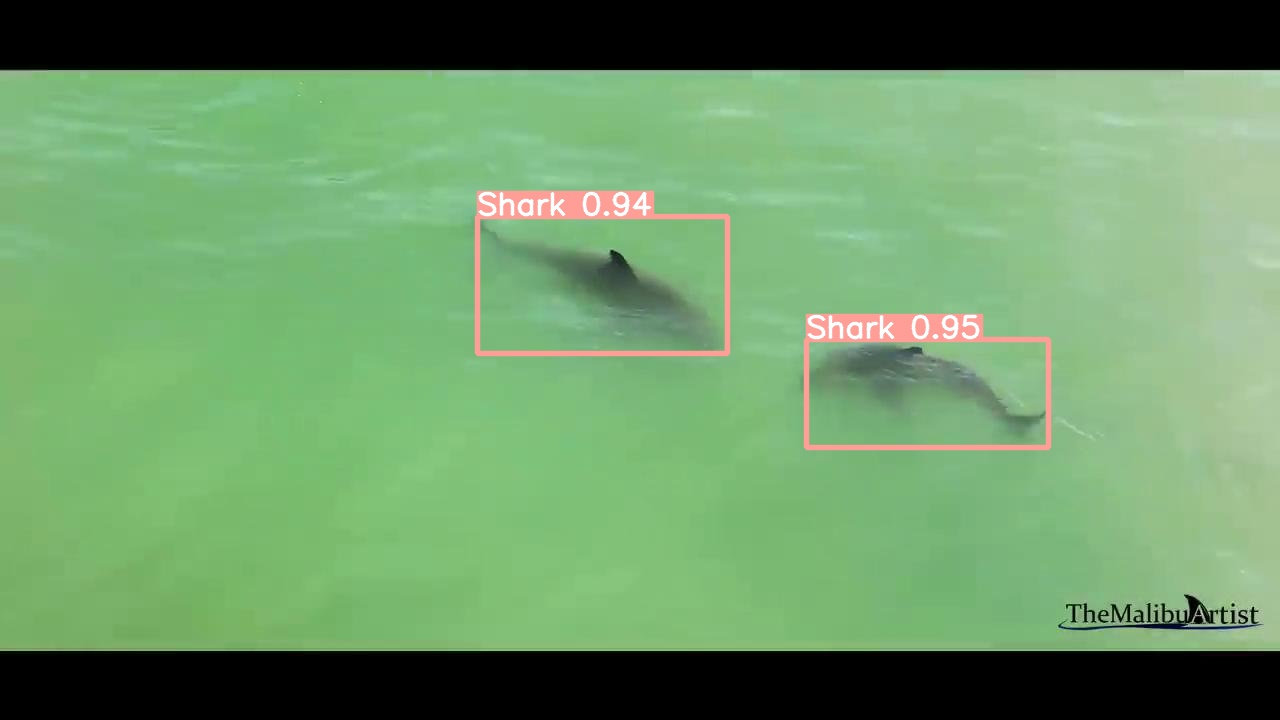

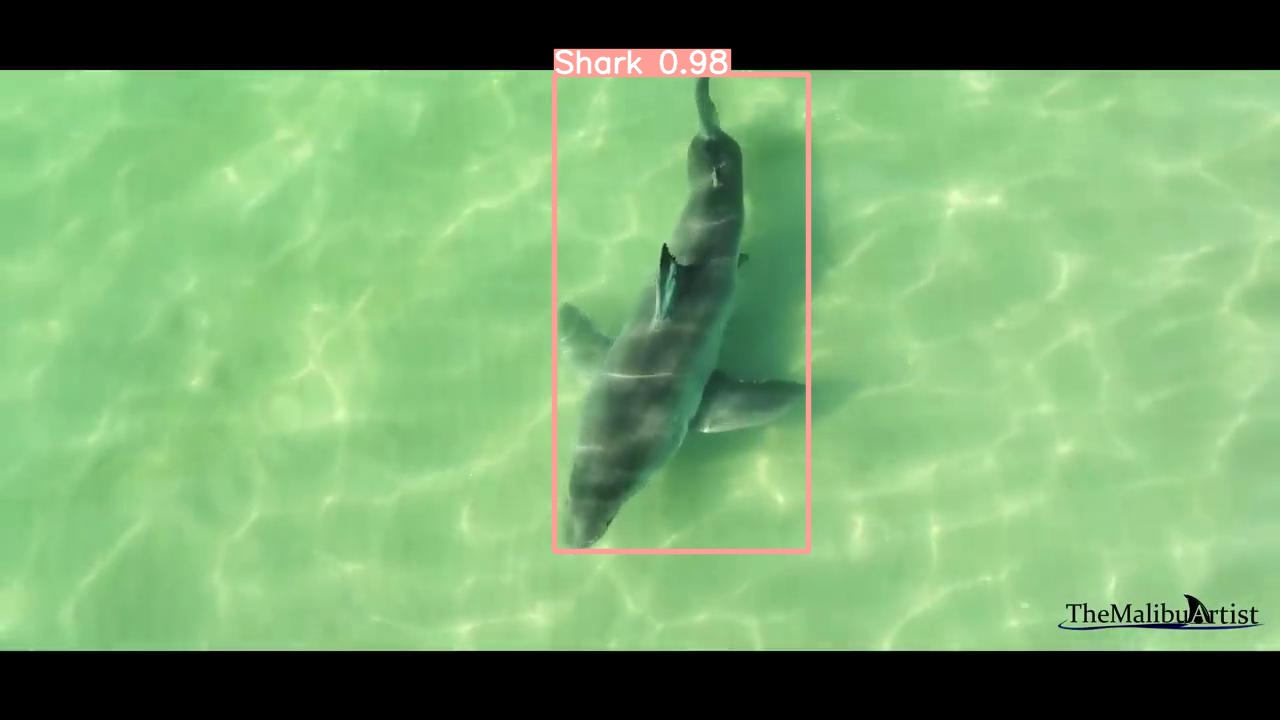

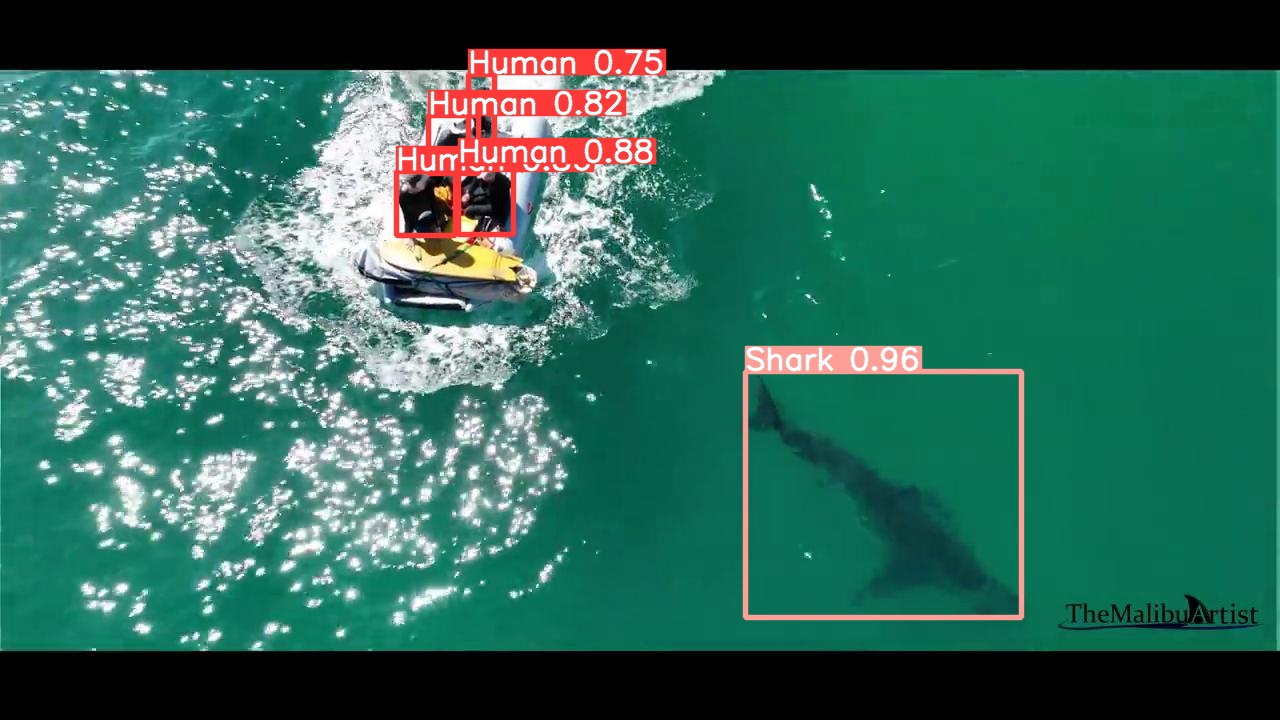

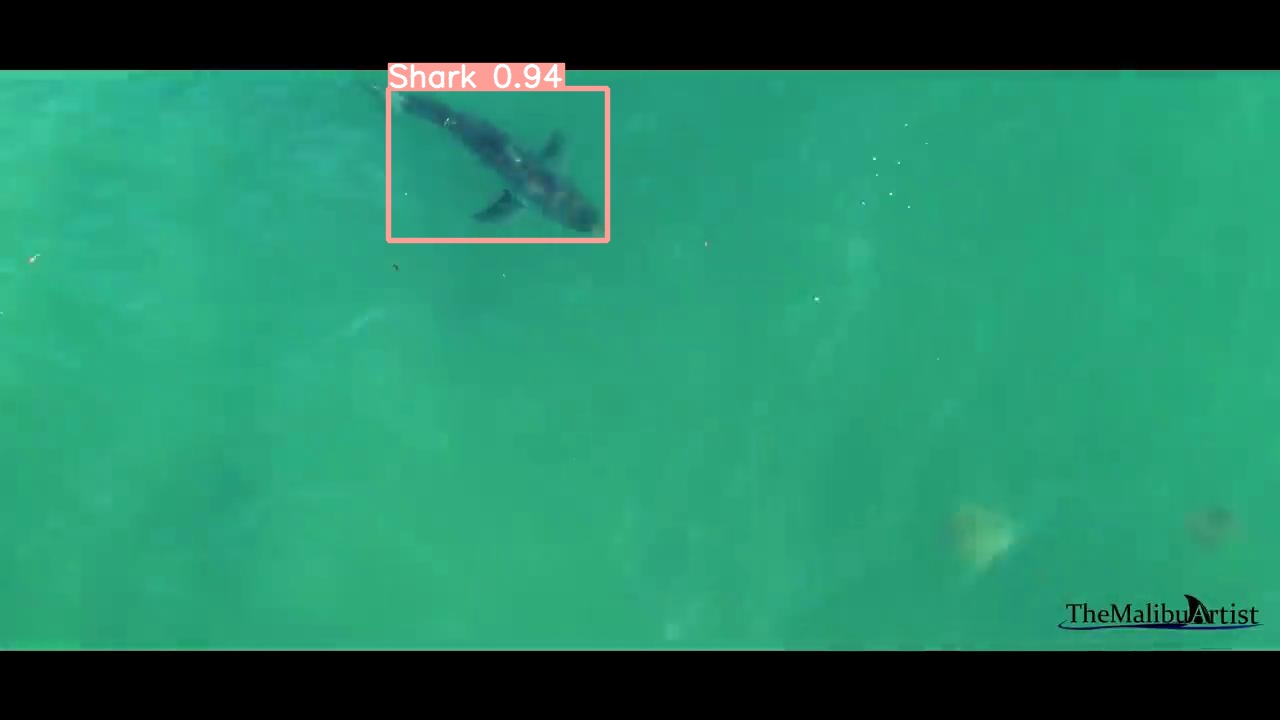

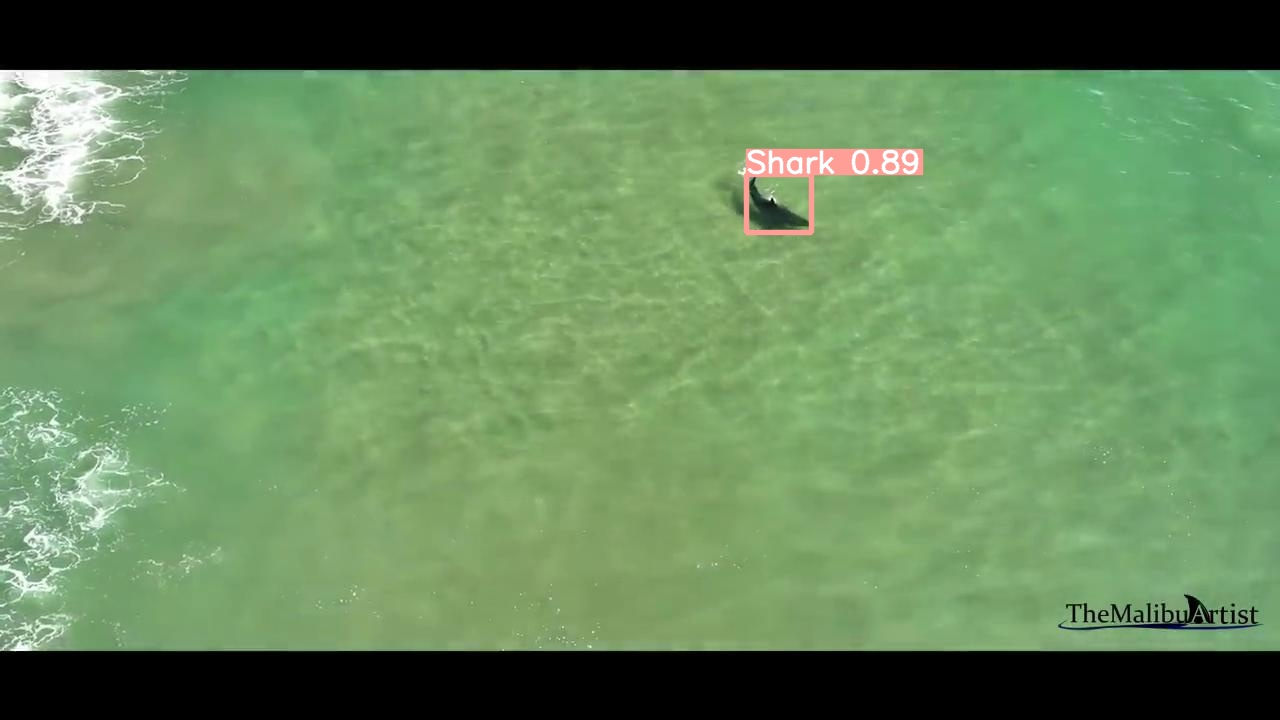

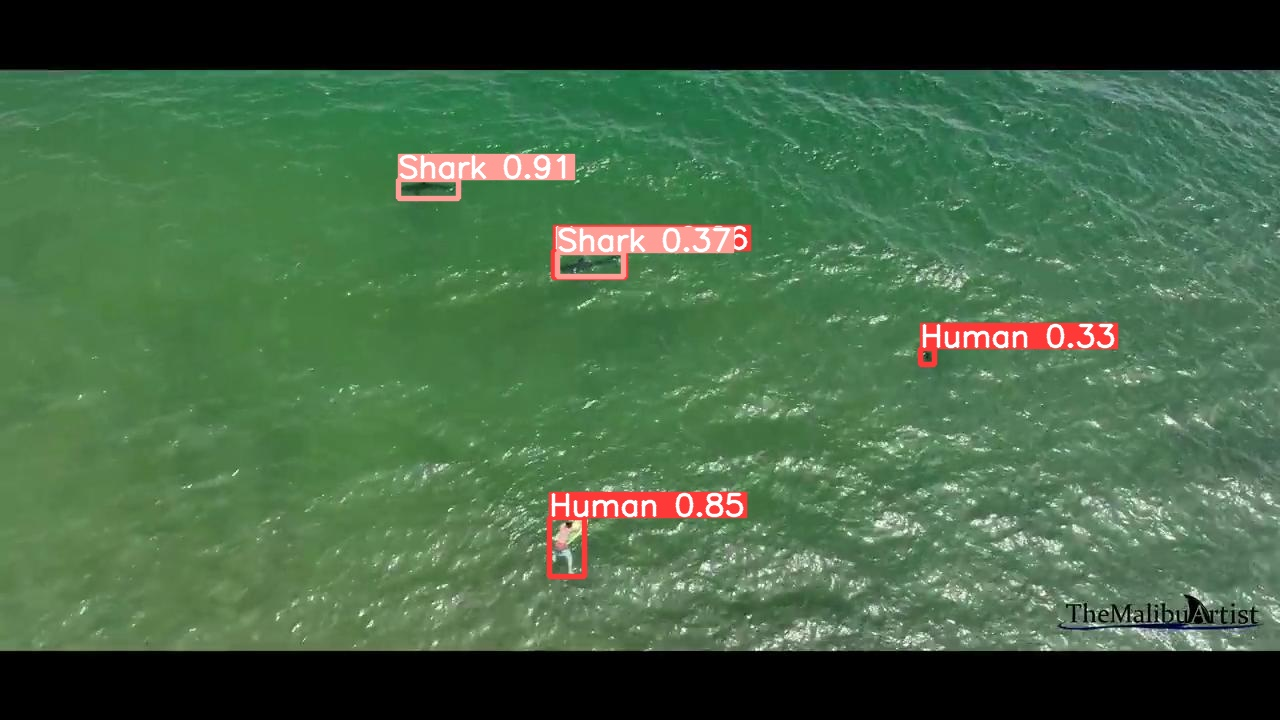

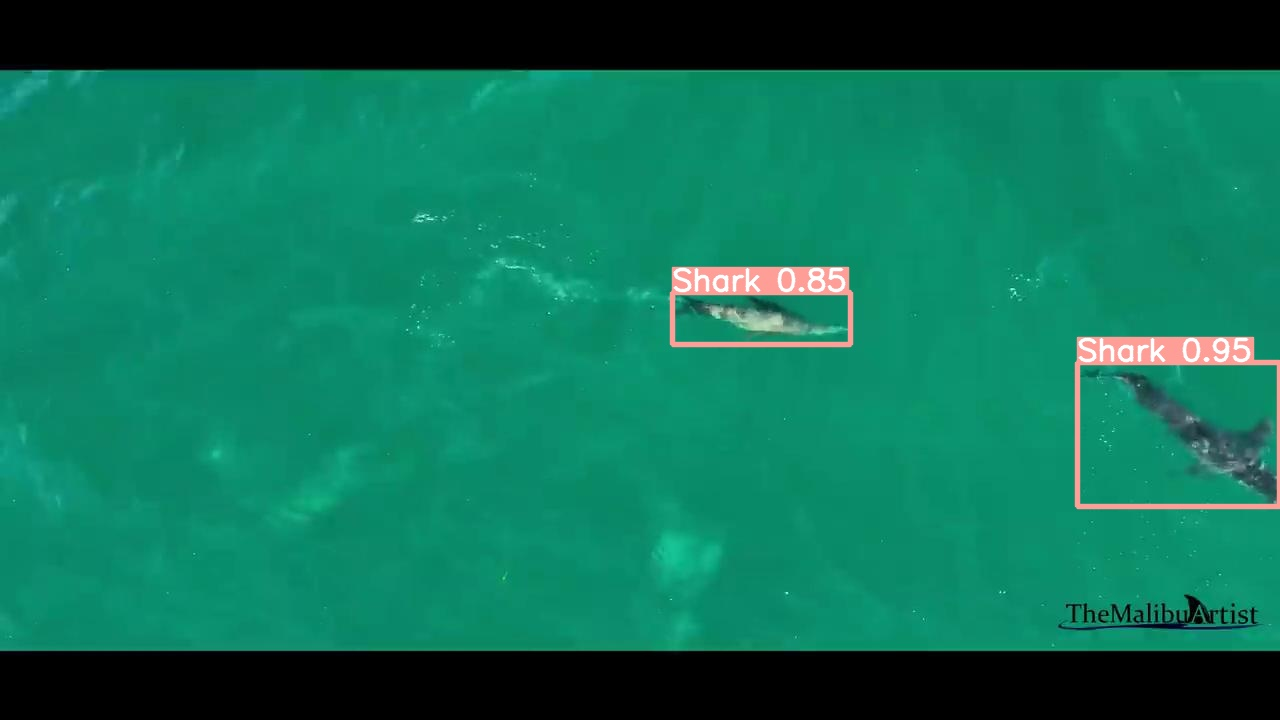

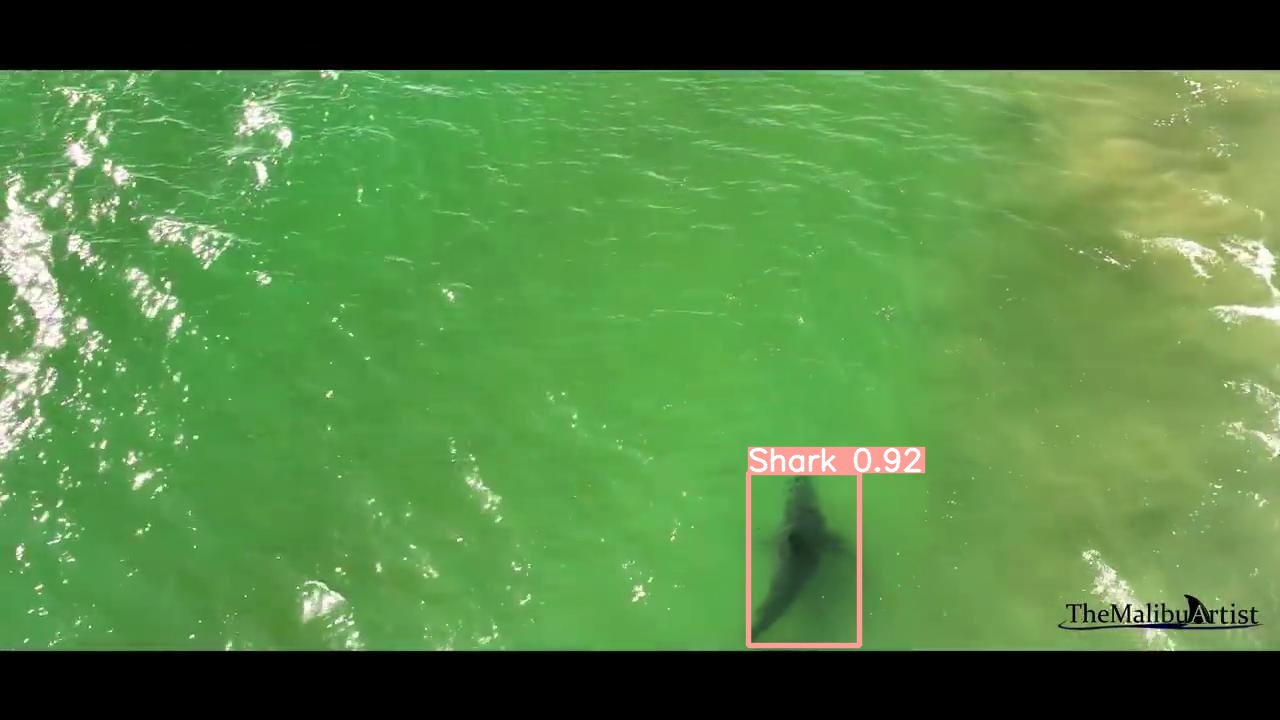

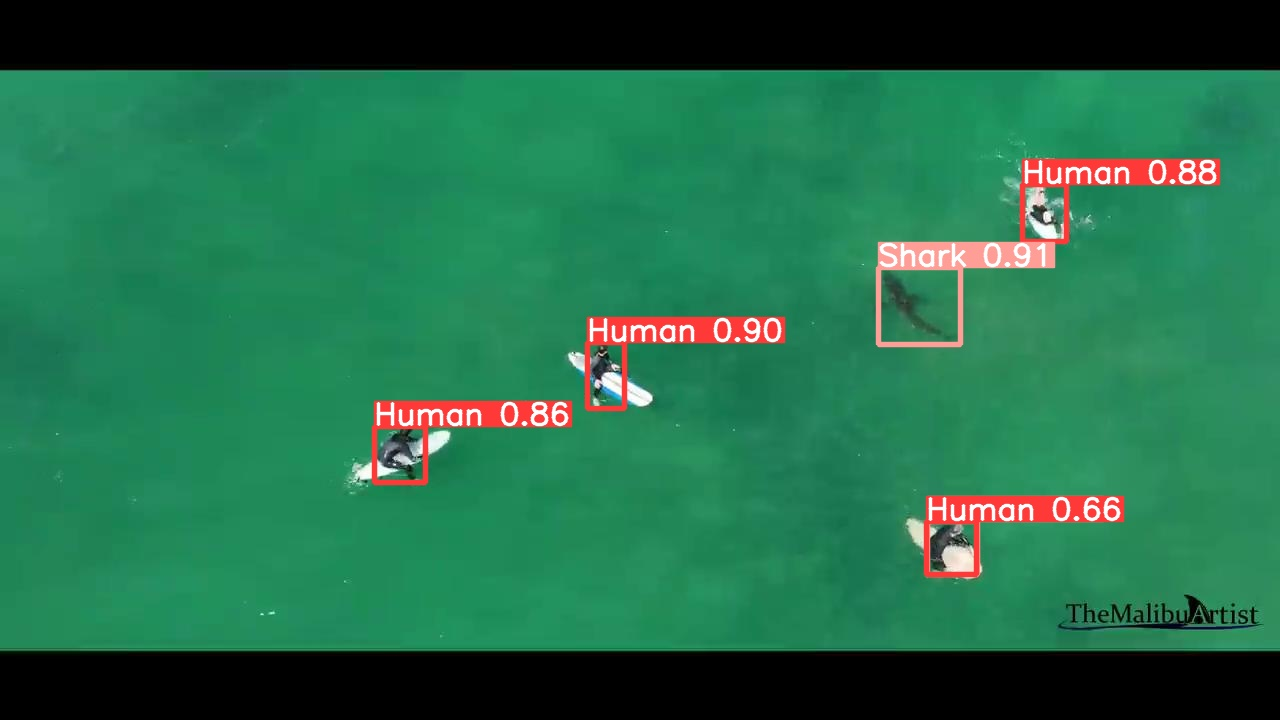

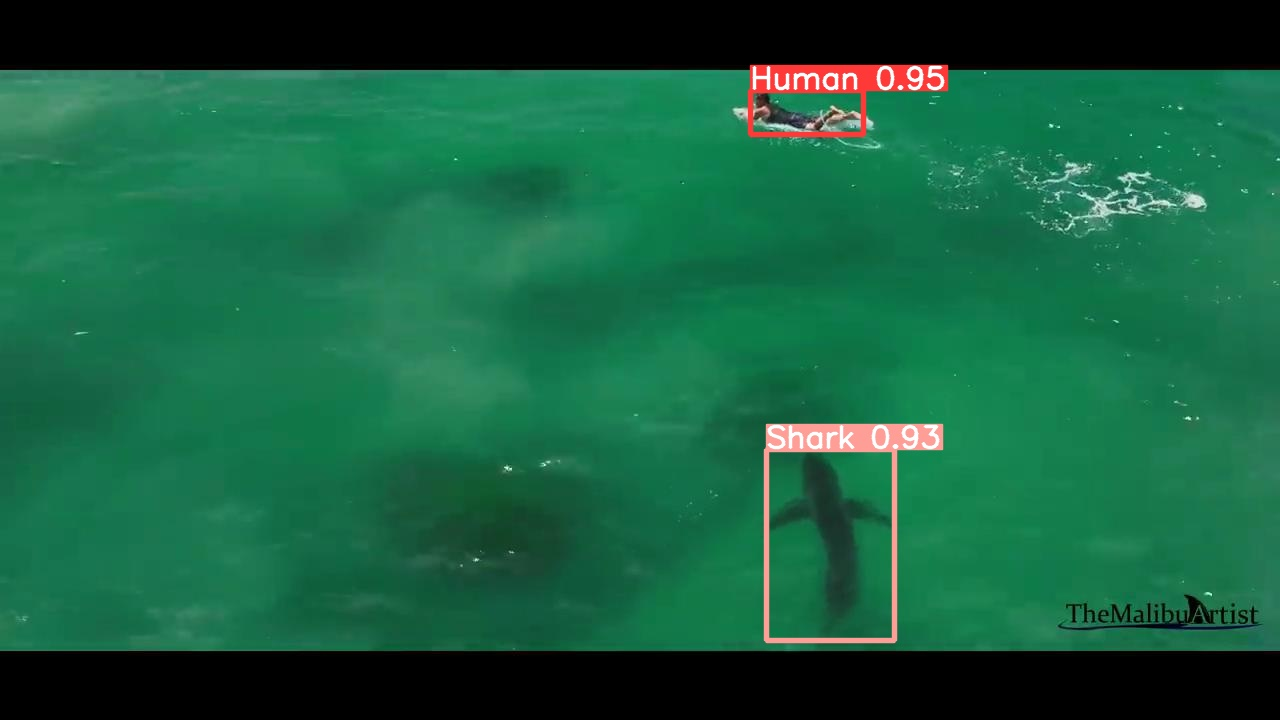

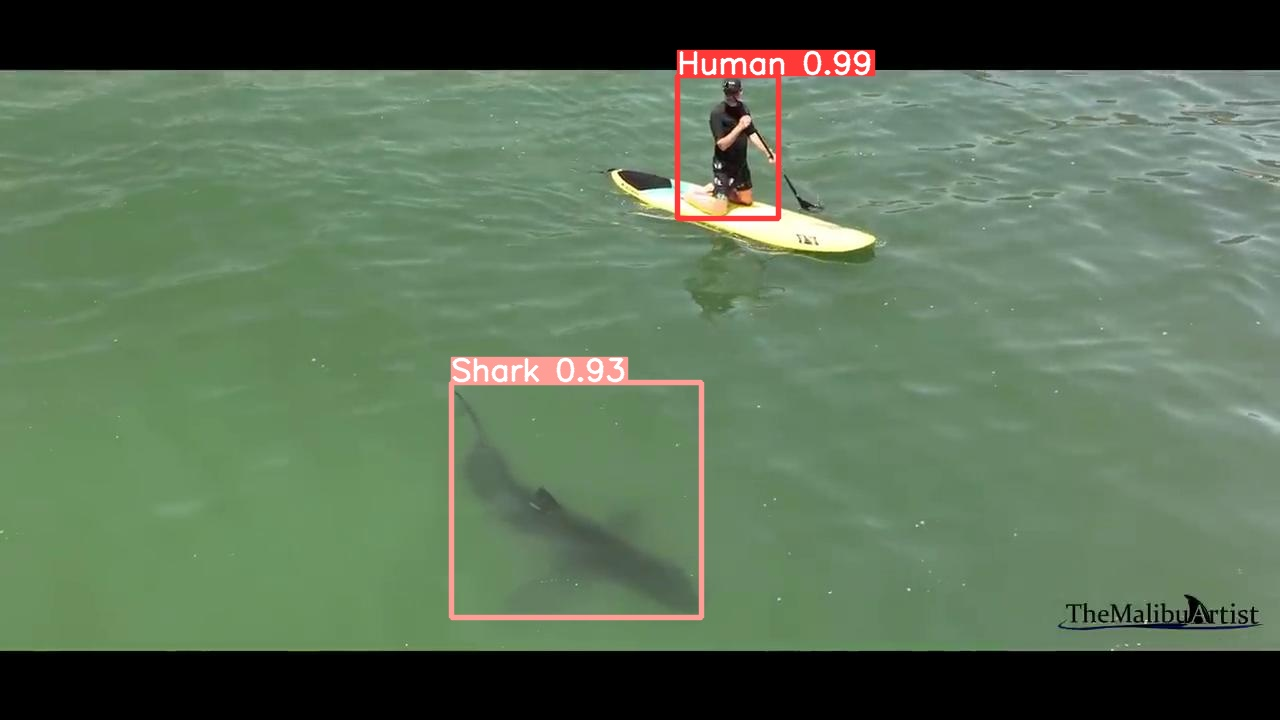

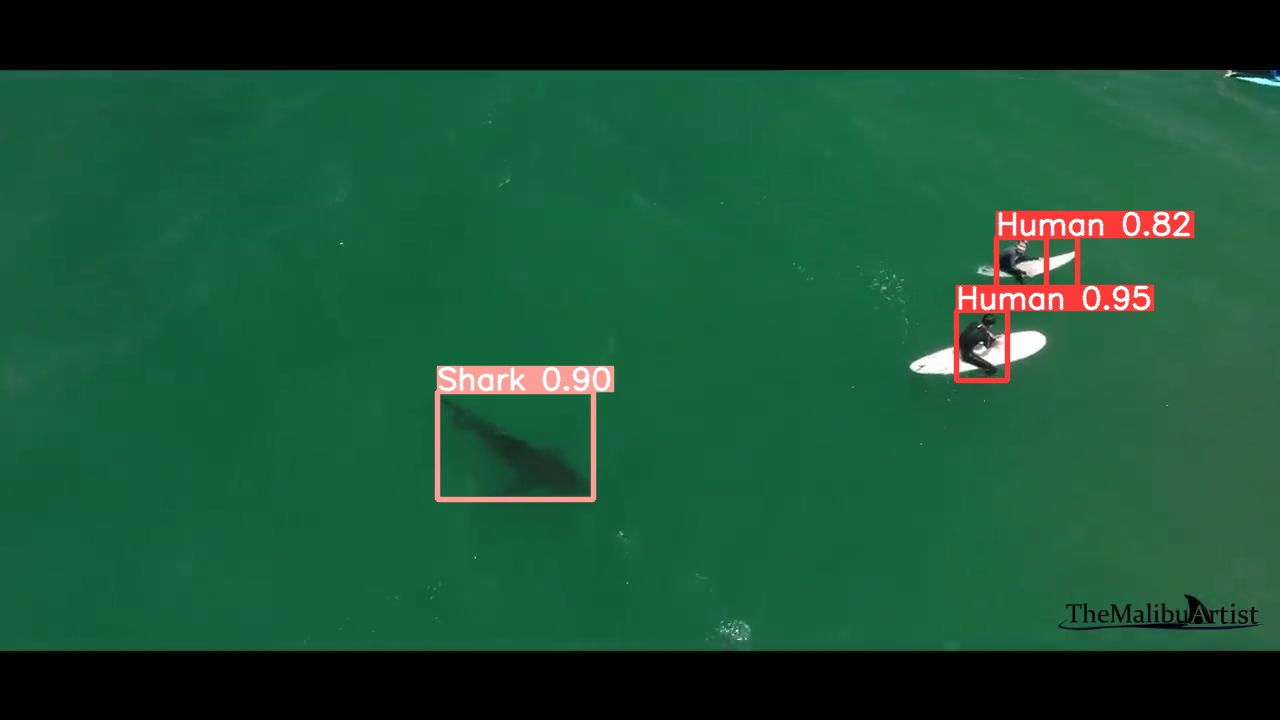

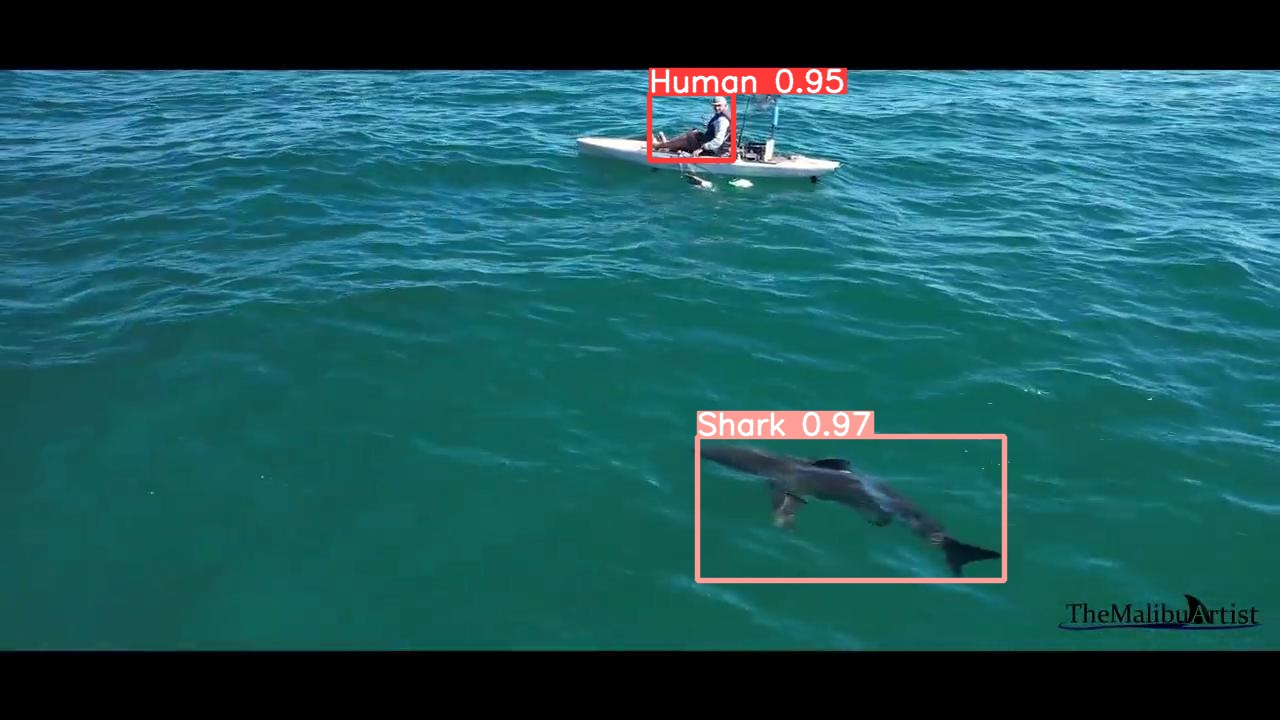

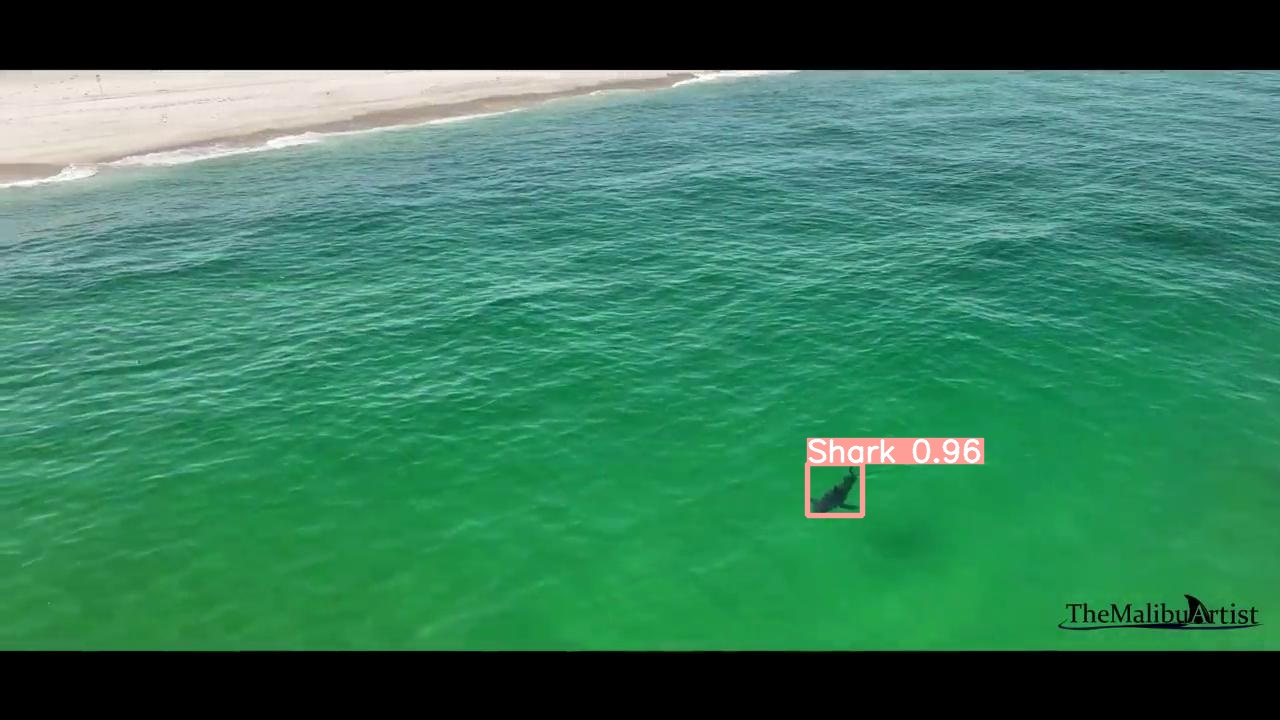

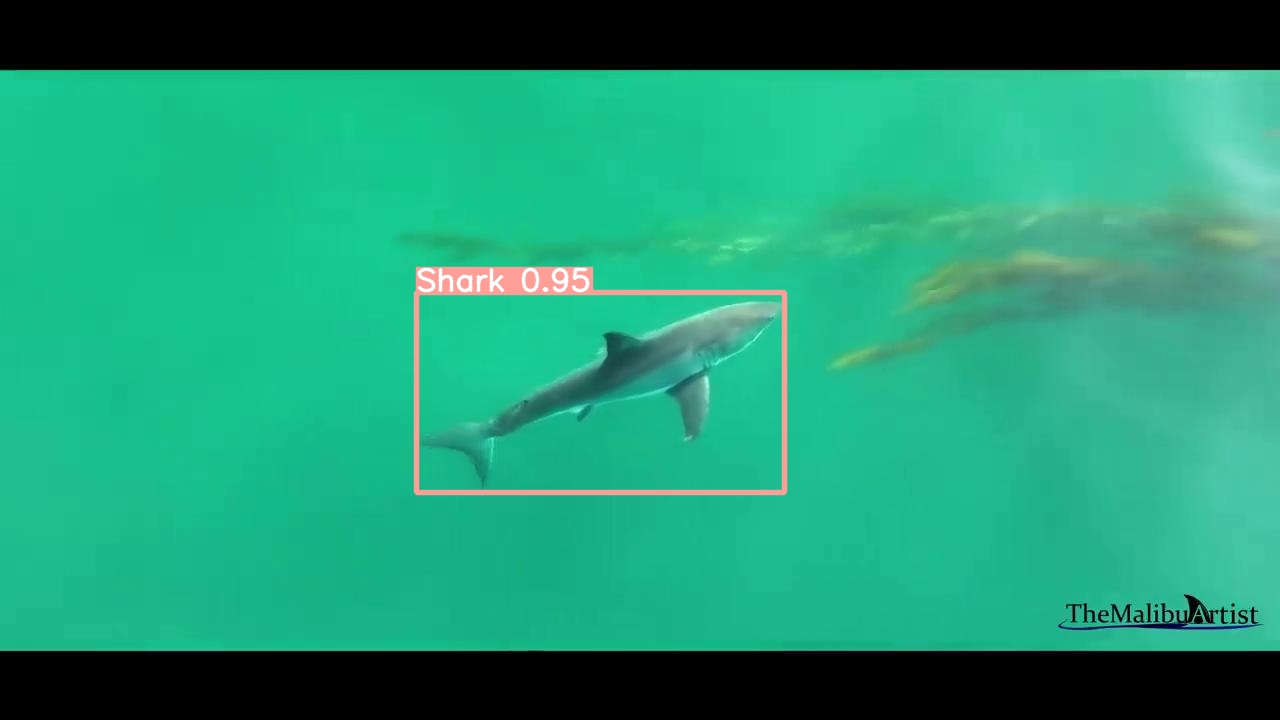

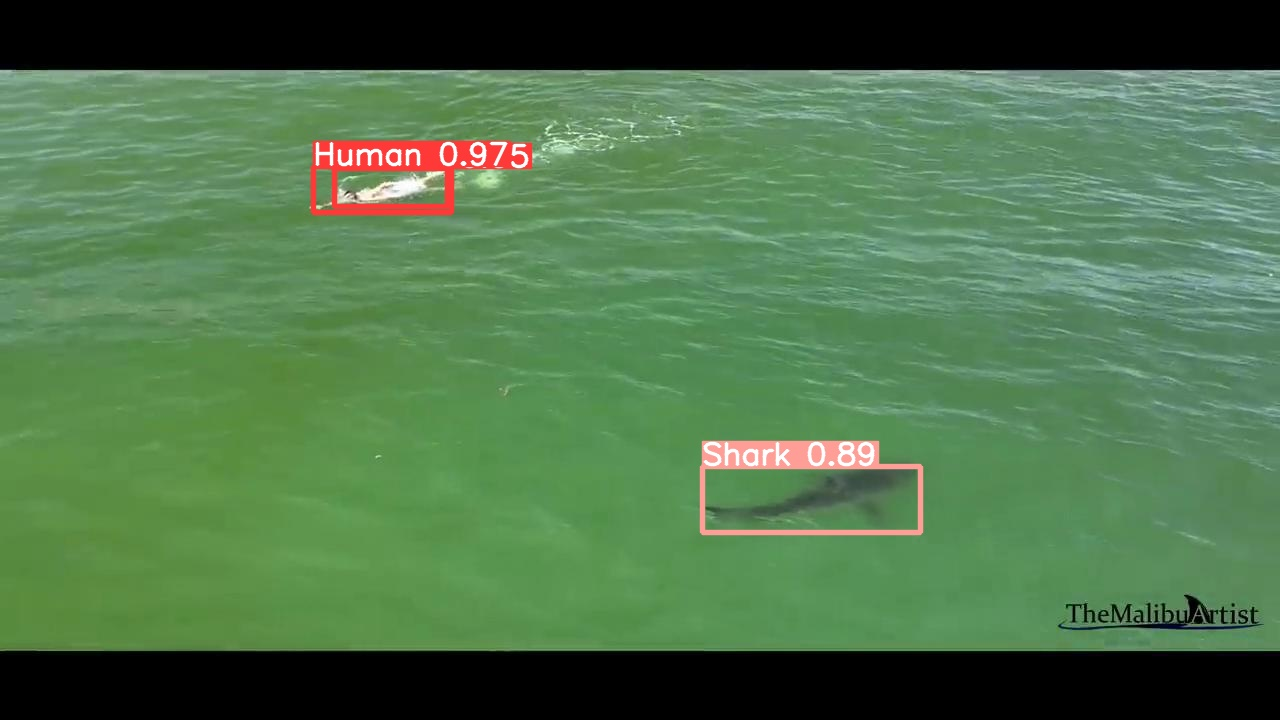

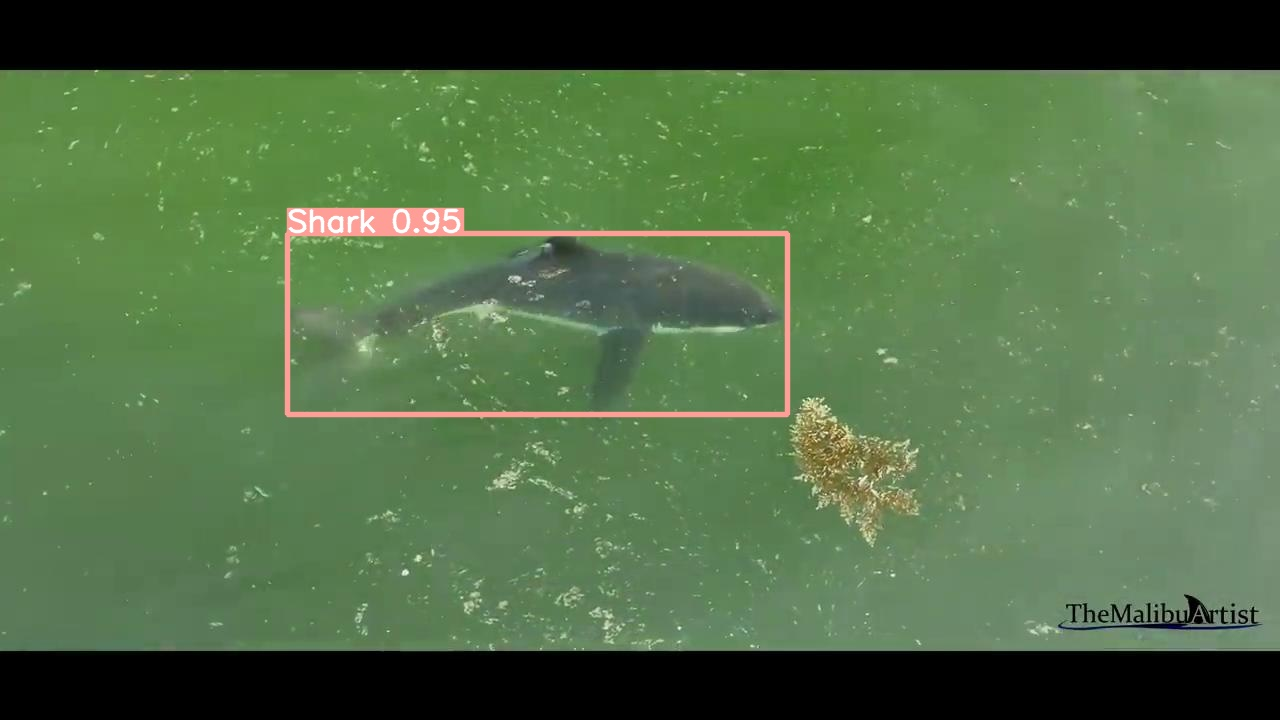

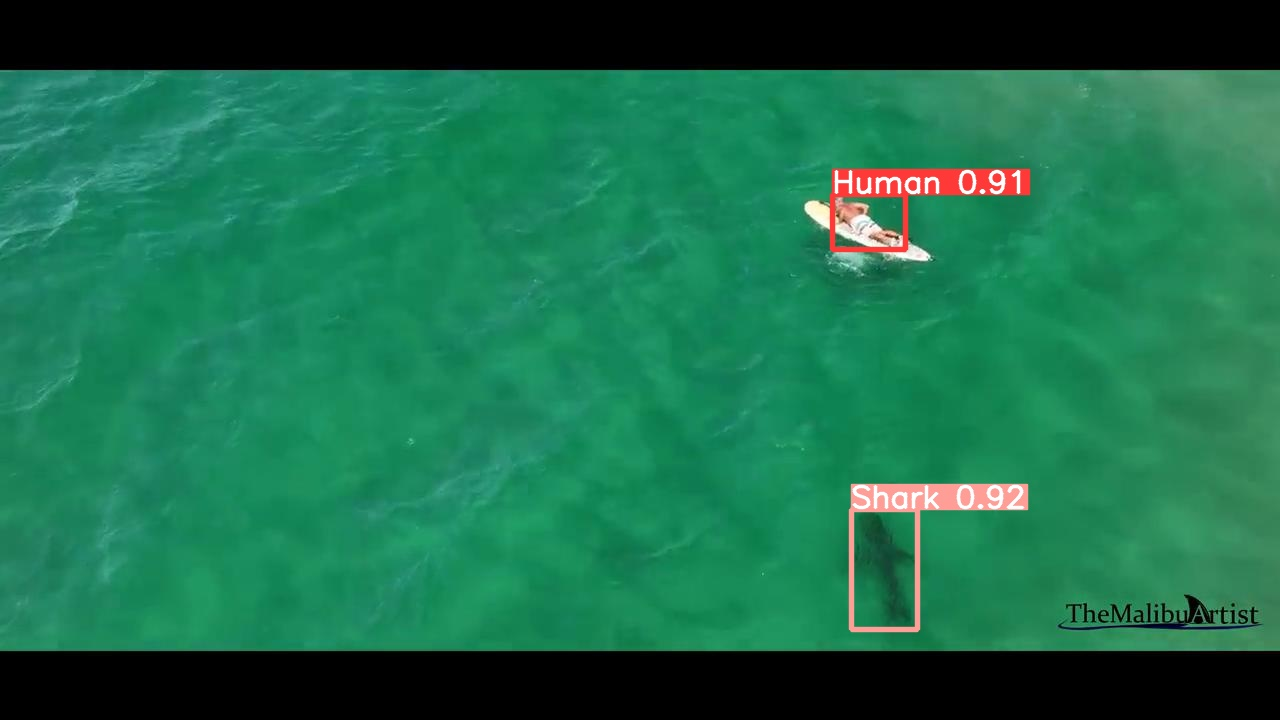

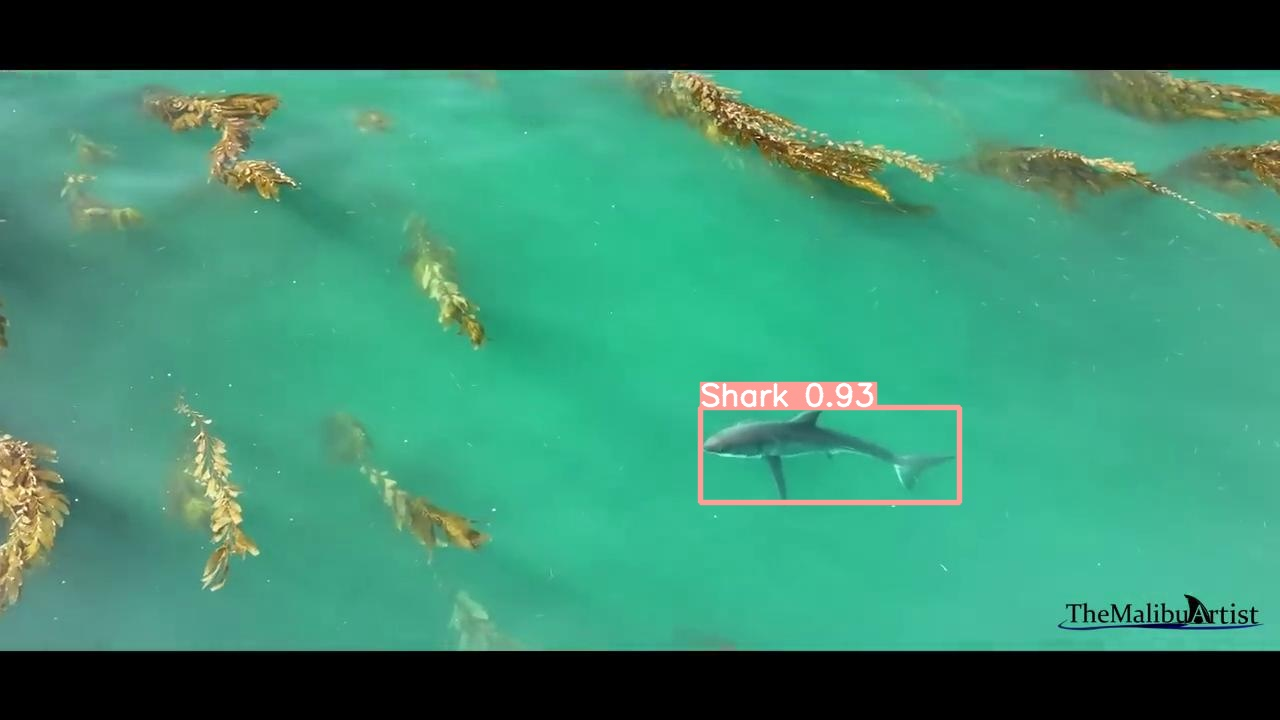

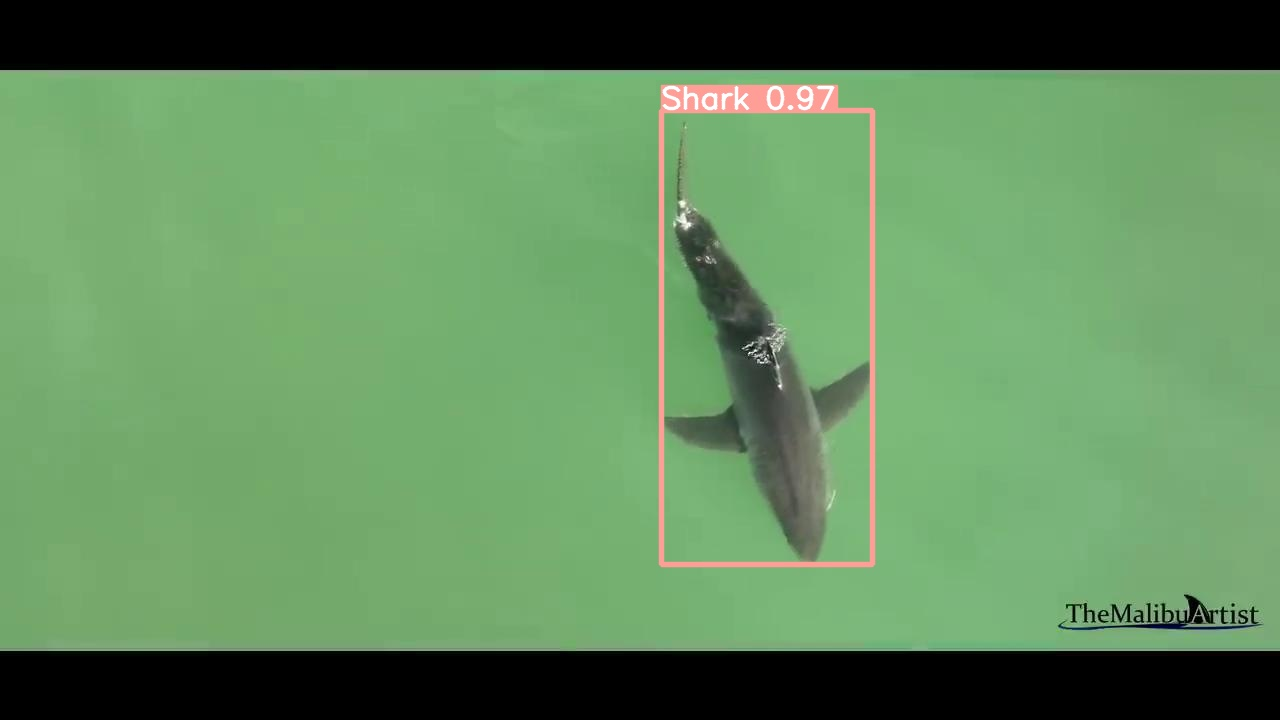

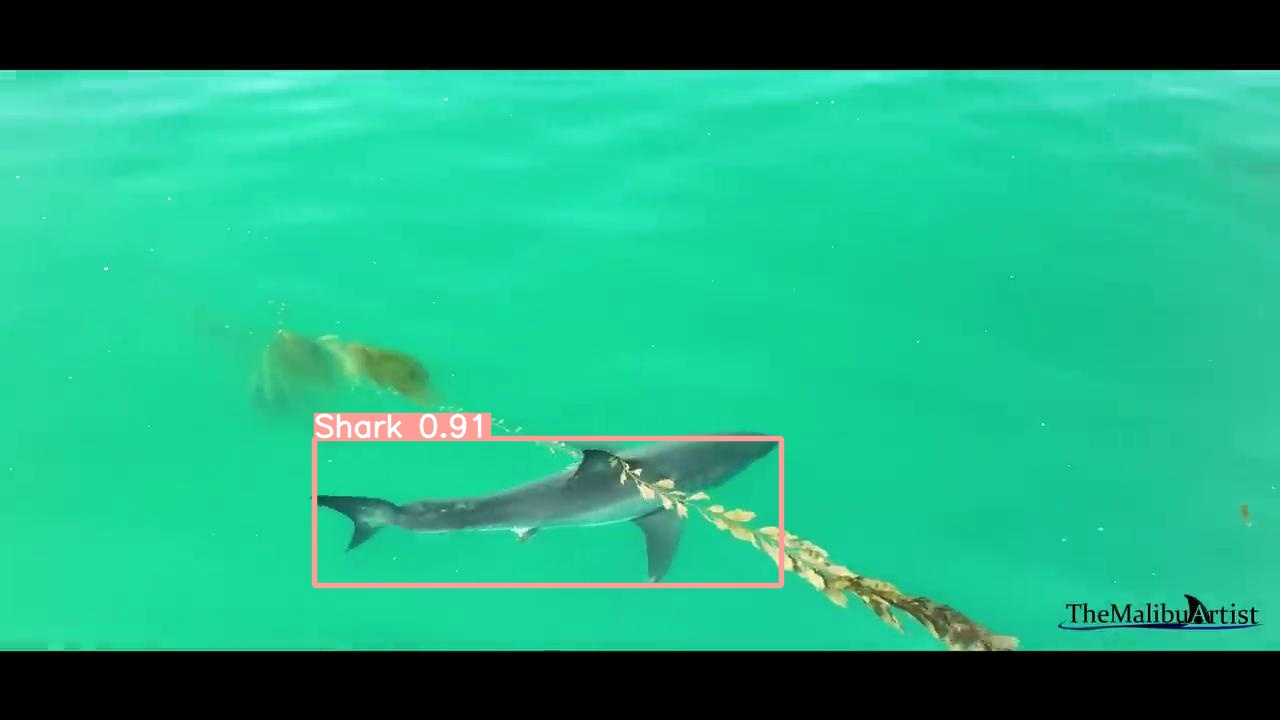

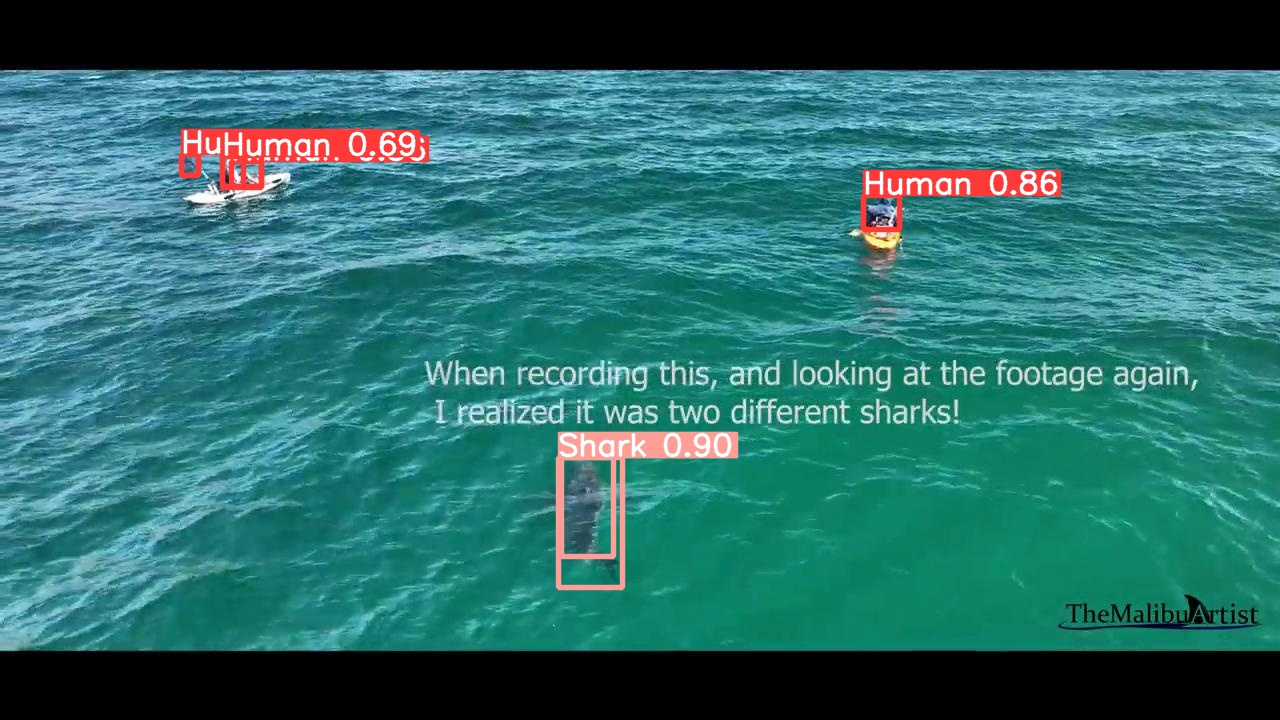

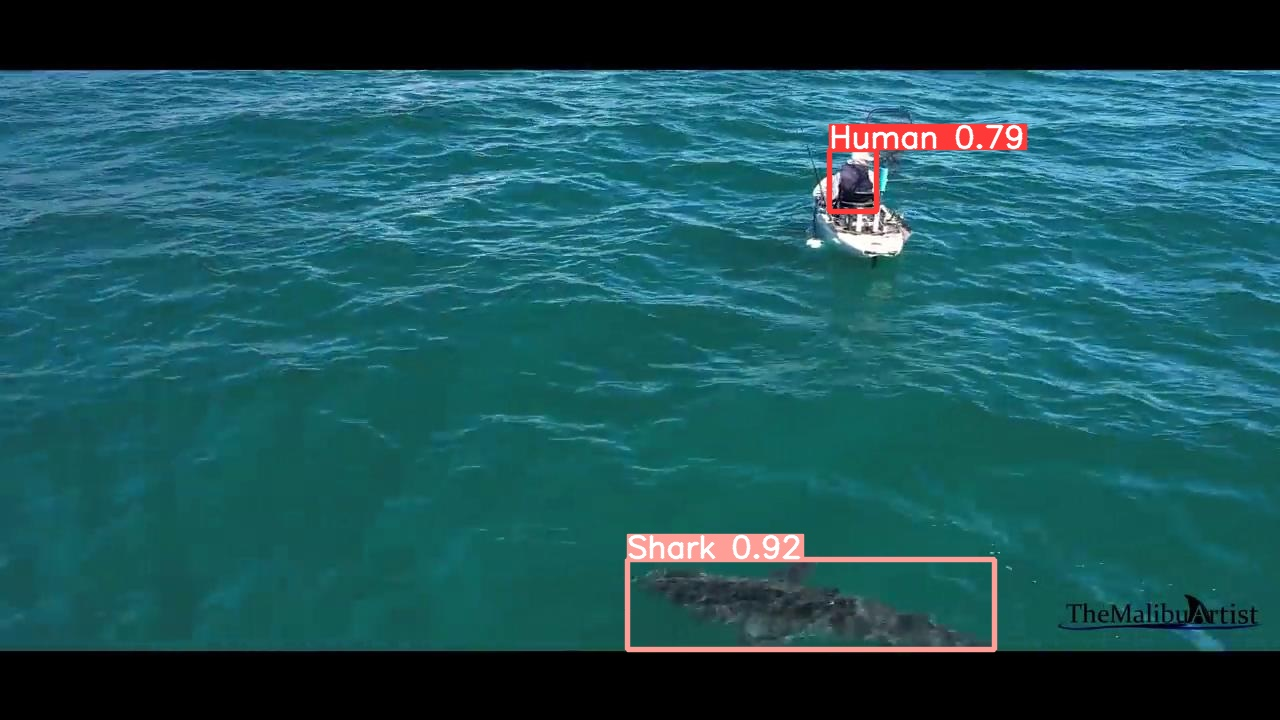

In [45]:
import glob

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:25]:
      display(Image(filename=image_path, width=600))
      print("\n")